val acc:0.17 | lr:0.0004888662926425177, weight decay:2.749507724087259e-06
val acc:0.11 | lr:7.099980707010672e-05, weight decay:2.988063467919361e-06
val acc:0.66 | lr:0.005218943661328639, weight decay:9.067316971549421e-05
val acc:0.07 | lr:0.00044457809647299626, weight decay:7.262836728808803e-05
val acc:0.12 | lr:1.953020084183518e-05, weight decay:6.715479226342922e-05
val acc:0.08 | lr:5.726118226034106e-06, weight decay:6.43220604396383e-05
val acc:0.23 | lr:0.0005032522342570598, weight decay:9.00600406647849e-07
val acc:0.16 | lr:0.0002101205402943195, weight decay:1.3052943247611142e-07
val acc:0.08 | lr:0.00010784937395098719, weight decay:3.819508524349532e-06
val acc:0.11 | lr:0.00016832556244031273, weight decay:3.36522767009349e-06
val acc:0.16 | lr:0.0007663596152102282, weight decay:1.2923479514548932e-06
val acc:0.12 | lr:6.099804257846627e-06, weight decay:3.059032741849575e-07
val acc:0.07 | lr:0.0008360219778508007, weight decay:2.581101963296101e-07
val acc:0.0

Best-12(val acc:0.57) | lr:0.00401021196301855, weight decay:8.382092018199084e-06
Best-13(val acc:0.42) | lr:0.002374813265061551, weight decay:8.685298774961166e-07
Best-14(val acc:0.42) | lr:0.0033065992186234665, weight decay:4.9604910654066845e-06
Best-15(val acc:0.38) | lr:0.0018268192241457132, weight decay:4.30476422504273e-05
Best-16(val acc:0.37) | lr:0.0019341328327709675, weight decay:3.9621975660750935e-06
Best-17(val acc:0.36) | lr:0.0028513476326022203, weight decay:3.254784494721212e-05
Best-18(val acc:0.35) | lr:0.0014658370643816688, weight decay:1.3336552229024618e-05
Best-19(val acc:0.32) | lr:0.001125080340968232, weight decay:3.7890432849739346e-08
Best-20(val acc:0.32) | lr:0.002093042103163168, weight decay:8.794785813264871e-07


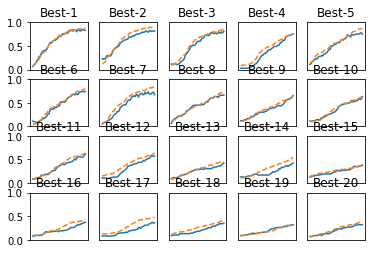

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
